In [4]:
from __future__ import print_function

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=False)

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:748)>

### A simple tensorflow machine learning problem: digit recognition

#### Define the blocks
Always remember the mental model:
input => representation learning => loss => optimizer

Step 1: define input (and output, because during the training we need the ground truth as reference)

In [43]:
tf.reset_default_graph()
# [1] Input
x = tf.placeholder(tf.float32, [None, 784])
# y_ holds the true output, 
# we use this placeholder to pass the true recognition result to teach the network
y_ = tf.placeholder(tf.int32, [None])

Step 2: Representation learning (the network that reveals the information contained in the image). Here we use 1 layer of fully connected network

In [44]:
# [2] network
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
O = tf.matmul(x, W) + b

Step 3: loss function, to define what's a good prediction 

In [70]:
# [3] loss, this loss function below outputs a scalar to show who close the network's guess
# O can represent the true recognition result y_. 
# Here O[j] shows a rating of how likely x is digit j, we will show that later
loss_all = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=O, labels=y_)
loss = tf.reduce_mean(loss_all)

step 4: Optimizer, strategy for training

In [54]:
# [4] Optimizer
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(loss)
# [optional, compute accuracy so that we can know how well we are doing while training]
prediction = tf.argmax(tf.nn.softmax(O), 1, output_type=tf.int32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction, y_), tf.float32))

#### Training
Call "train_step" a number of time; you can call this block multiple times until it reaches a good accuracy

In [75]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# training, stop when objective value (o) is small enough
for step in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(64)
    _, v_loss = sess.run([train_step, loss], feed_dict={x: batch_xs, y_: batch_ys})
    if (step % 100 == 99):
        batch_xs, batch_ys = mnist.test.next_batch(512)
        v_acc, v_loss = sess.run([accuracy, loss], feed_dict={x: batch_xs, y_: batch_ys})
        # print the loss every 100 interations
        print('accuracy=', v_acc, 'loss=', v_loss)

accuracy= 0.882812 loss= 0.400135
accuracy= 0.894531 loss= 0.371845
accuracy= 0.910156 loss= 0.297113
accuracy= 0.90625 loss= 0.336992
accuracy= 0.894531 loss= 0.354167
accuracy= 0.914062 loss= 0.346689
accuracy= 0.902344 loss= 0.327471
accuracy= 0.910156 loss= 0.273238
accuracy= 0.90625 loss= 0.380196
accuracy= 0.910156 loss= 0.323513


#### Results

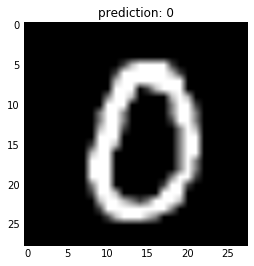

ratings of each digits, learned by the network
[ 11.64466095 -12.05424881   2.06711721   1.30002677  -5.32592726
   4.22855711  -2.50841475  -4.65583611   4.21255922   1.09150505]


In [79]:
# get the learned variable and objective
%matplotlib inline
# grab some data
batch_xs, batch_ys = mnist.test.next_batch(100)
# pass it throught the network and get accuracy, loss, the objective function and prediction
# values
v_acc, v_loss, v_o, v_pred = sess.run(
    [accuracy, loss, O, prediction], feed_dict={x: batch_xs, y_: batch_ys})
input_image = np.reshape(batch_xs[0], [28,28])

# visualize the input and print the prediction on title
plt.title('prediction: ' + str(v_pred[0]))
plt.imshow(input_image, cmap='gray')
plt.show()

# print what the network output before the loss function
print('ratings of each digits, learned by the network')
print(v_o[0])

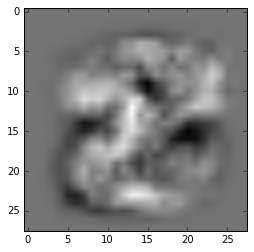

In [97]:
# visualize what the network has learned for predicting 8 by looking at the variable W
w = sess.run(W)
w = np.reshape(w[:,8], [28,28])
plt.imshow(w, cmap='gray')
plt.show()